In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
n_inputs = 2
n_hidden1 = 20
n_outputs = 1

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None))

In [4]:
hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1, activation_fn=tf.nn.elu)
output = tf.contrib.layers.fully_connected(hidden1, n_outputs, activation_fn=None)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
with tf.name_scope('loss'):
    loss = tf.losses.mean_squared_error(y, output)

Instructions for updating:
Use tf.cast instead.


In [6]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer().minimize(loss)
#     optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
#     optimizer = tf.train.MomentumOptimizer(learning_rate=0.005, momentum=0.9).minimize(loss)

Instructions for updating:
Use tf.cast instead.


# Execution 

In [7]:
init = tf.global_variables_initializer()

4.548877
0.6975959
0.69143933
0.6760974
0.698027
0.7084687
0.67338216
0.7207089
0.70129377
0.6877186


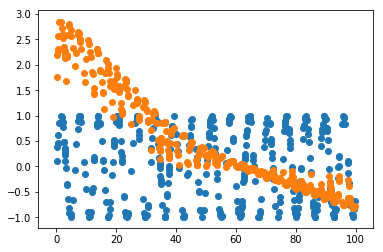

In [11]:
#train nn on range 50-65 and test on range 0-75
n_epochs = 60000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, n_epochs):
        
        period = np.pi
#         period = 2 * np.pi
        
#         value = np.random.rand(400, 1) * 15 #domain 0, 15
        value = np.random.uniform(50, 75, (400, 1))
        label = np.sin(value)
        cycle = value / period #value / period of sine function
        value_no_cycle = value % period #value % period of sine
        
        values = np.column_stack((cycle, value_no_cycle))
        
        sess.run(optimizer, feed_dict={X:values, y: label})
        if epoch % 6000 == 0:
            acc = loss.eval(feed_dict={X:values, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values_test = np.random.rand(400, 1) * 100
#     value = np.random.uniform(50, 75, (400, 1))
    actual_test = np.sin(values_test)
    
    
    cycle_test = values_test / period
    value_no_cycle_test = values_test % period
    
    values_combined = np.column_stack((cycle_test, value_no_cycle_test))
    
    predictions = output.eval(feed_dict={X: values_combined})
    plt.scatter(values_test, actual_test)
    plt.scatter(values_test, predictions)

1.1213764
0.6326307
0.58458513
0.5550718
0.5023839
0.530828
0.5234124
0.48859182
0.50440127
0.50641525


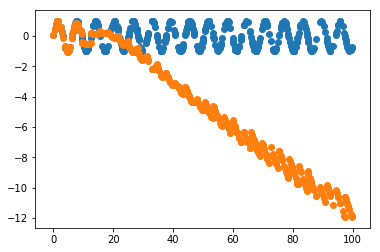

In [17]:
#train nn on range 0-25 and test on 0-100
n_epochs = 60000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, n_epochs):
        
        period = np.pi
#         period = 2 * np.pi
        
#         value = np.random.rand(400, 1) * 15 #domain 0, 15
        value = np.random.rand(400, 1) *25
        label = np.sin(value)
        cycle = value / period #value / period of sine function
        value_no_cycle = value % period #value % period of sine
        
        values = np.column_stack((cycle, value_no_cycle))
        
        sess.run(optimizer, feed_dict={X:values, y: label})
        if epoch % 6000 == 0:
            acc = loss.eval(feed_dict={X:values, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values_test = np.random.rand(400, 1) * 100
#     value = np.random.uniform(50, 75, (400, 1))
    actual_test = np.sin(values_test)
    
    
    cycle_test = values_test / period
    value_no_cycle_test = values_test % period
    
    values_combined = np.column_stack((cycle_test, value_no_cycle_test))
    
    predictions = output.eval(feed_dict={X: values_combined})
    plt.scatter(values_test, actual_test)
    plt.scatter(values_test, predictions)